# **INSIDER THREAT USING TRANSFORMERS ON USER ACTIVITY LOGS**

**Topik Riset:**

"Deteksi Ancaman Internal Menggunakan Transformer untuk Menganalisis Log Aktivitas Pengguna"

**Deskripsi:**

Transformer digunakan untuk menganalisis aktivitas pengguna secara menyeluruh. Model ini dilatih untuk mendeteksi pola akses yang tidak biasa oleh pengguna internal, seperti akses data di luar jam kerja atau aktivitas mencurigakan lainnya, dengan mempelajari urutan akses file dan sistem.

**Novelty:**

Sedang hingga tinggi. Insider threat sudah menjadi fokus penelitian dengan berbagai metode deteksi perilaku anomali. Namun, Transformer, dengan kemampuannya untuk menangkap perubahan perilaku yang halus dalam urutan log, menawarkan pendekatan baru yang dapat meningkatkan performa deteksi.


**Dataset: CERT Insider threat**

Dataset ini berisi data aktivitas pengguna yang mencurigakan dan bisa digunakan untuk mendeteksi Insider Threat. Model Transformer bisa mengenali pola akses yang anomali berdasarkan log pengguna.

URL: https://www.kaggle.com/datasets/nitishabharathi/cert-insider-threat


# **Importing Modules and Libraries**

In [1]:
!pip install numpy pandas seaborn matplotlib scikit-learn

In [2]:
!pip list | findstr numpy

/bin/bash: line 1: findstr: command not found
ERROR: Pipe to stdout was broken
Exception ignored in: <_io.TextIOWrapper name='<stdout>' mode='w' encoding='utf-8'>
BrokenPipeError: [Errno 32] Broken pipe


In [3]:
!pip install torch torchvision torchaudio

In [19]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# **Importing Datasets**

In [20]:
import pandas as pd

Data = pd.read_csv('email.csv')

In [21]:
Data.head(n=5)

,id,date,user,pc,to,cc,bcc,from,size,attachments,content
0,{R3I7-S4TX96FG-8219JWFF},01/02/2010 07:11:45,LAP0338,PC-5758,Dean.Flynn.Hines@dtaa.com;Wade_Harrison@lockhe...,Nathaniel.Hunter.Heath@dtaa.com,NaN,Lynn.Adena.Pratt@dtaa.com,25830,0,middle f2 systems 4 july techniques powerful d...
1,{R0R9-E4GL59IK-2907OSWJ},01/02/2010 07:12:16,MOH0273,PC-6699,Odonnell-Gage@bellsouth.net,NaN,NaN,MOH68@optonline.net,29942,0,the breaking called allied reservations former...
2,{G2B2-A8XY58CP-2847ZJZL},01/02/2010 07:13:00,LAP0338,PC-5758,Penelope_Colon@netzero.com,NaN,NaN,Lynn_A_Pratt@earthlink.net,28780,0,slowly this uncinus winter beneath addition ex...
3,{A3A9-F4TH89AA-8318GFGK},01/02/2010 07:13:17,LAP0338,PC-5758,Judith_Hayden@comcast.net,NaN,NaN,Lynn_A_Pratt@earthlink.net,21907,0,400 other difficult land cirrocumulus powered ...
4,{E8B7-C8FZ88UF-2946RUQQ},01/02/2010 07:13:28,MOH0273,PC-6699,Bond-Raymond@verizon.net;Alea_Ferrell@msn.com;...,NaN,Odonnell-Gage@bellsouth.net,MOH68@optonline.net,17319,0,this kmh october holliswood number advised unu...


In [22]:
data = Data.sample(frac=0.02, random_state=42)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52600 entries, 1375085 to 2049455
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           52600 non-null  object
 1   date         52600 non-null  object
 2   user         52600 non-null  object
 3   pc           52600 non-null  object
 4   to           52600 non-null  object
 5   cc           20035 non-null  object
 6   bcc          8272 non-null   object
 7   from         52600 non-null  object
 8   size         52600 non-null  int64 
 9   attachments  52600 non-null  int64 
 10  content      52600 non-null  object
dtypes: int64(2), object(9)
memory usage: 4.8+ MB


In [24]:
# Threshold ukuran (25KB)
size_threshold = 25000

# Fungsi untuk menentukan aktivitas di luar jam kerja
def is_after_hours(date_str):
    hour = pd.to_datetime(date_str).hour  # Ekstrak jam dari 'date'
    return hour < 8 or hour > 18  # Jam kerja dianggap antara 08:00 - 18:00

# Membuat label (1 = mencurigakan, 0 = normal)
data['label'] = data.apply(lambda x:
    1 if x['size'] > size_threshold or is_after_hours(x['date']) else 0, axis=1)

# Cek hasil labeling
print(data[['user', 'date', 'size', 'label']].head())


            user                 date   size  label
1375085  HWH0646  09/08/2010 09:48:21  53433      1
1760687  EMW0772  11/18/2010 11:40:48  23746      0
489761   HAD0246  03/29/2010 14:40:35  20984      0
670295   ASB0796  04/30/2010 10:57:44  33996      1
2611719  HCW0419  05/12/2011 11:45:23  37670      1


In [25]:
# Misalkan kolom yang berisi label adalah 'type'
# Menampilkan nilai unik dan jumlah setiap kelas
kelas = data['label'].value_counts()
print(kelas)

# Menampilkan jumlah kelas unik
jumlah_kelas = data['label'].nunique()
print(f"Jumlah kelas unik: {jumlah_kelas}")


label
1    35281
0    17319
Name: count, dtype: int64
Jumlah kelas unik: 2


In [26]:
data.shape

(52600, 12)

# **Data Visualization**

In [27]:
print(data.columns)

Index(['id', 'date', 'user', 'pc', 'to', 'cc', 'bcc', 'from', 'size',
       'attachments', 'content', 'label'],
      dtype='object')


In [28]:
print(data['label'].value_counts())

label
1    35281
0    17319
Name: count, dtype: int64


Jumlah kelas unik: 2


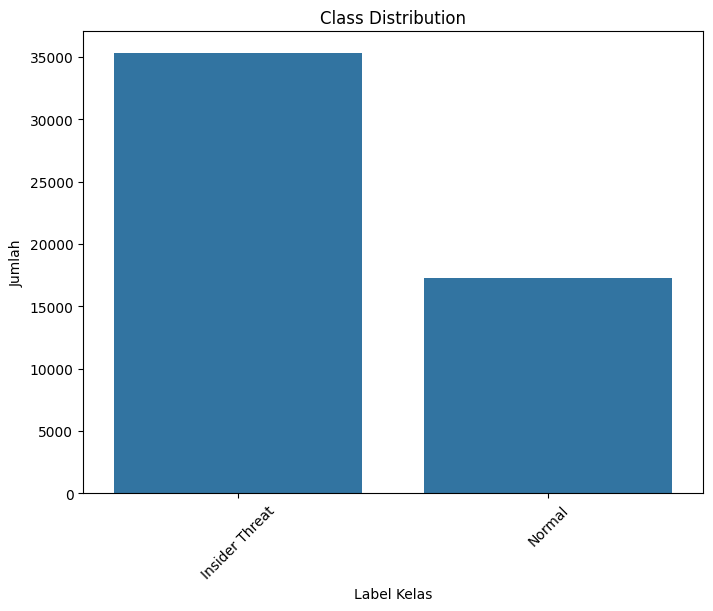

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan Anda telah menyiapkan DataFrame data
# Gantilah 'label' dengan nilai string sesuai label Anda
data['label'] = data['label'].replace({
    0: "Normal",
    1: "Insider Threat",
})

# Hitung jumlah kelas unik
jumlah_kelas = data['label'].nunique()
print(f"Jumlah kelas unik: {jumlah_kelas}")

# Visualisasi distribusi kelas dengan nama
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data)
plt.title('Class Distribution')
plt.xlabel('Label Kelas')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)  # Memutar label sumbu x jika perlu
plt.show()


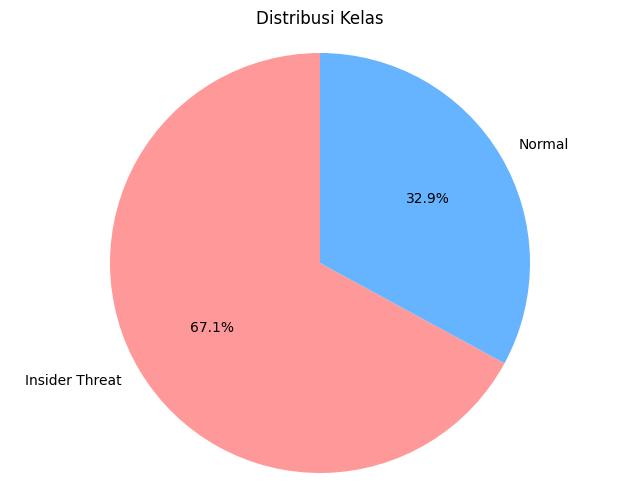

In [30]:
# Hitung jumlah setiap kelas
kelas_count = data['label'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(kelas_count, labels=kelas_count.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.axis('equal')  # Untuk membuat pie chart menjadi lingkaran
plt.title('Distribusi Kelas')
plt.show()


In [31]:
# Kembali ke format numerik
data['label'] = data['label'].replace({
    "Normal": 0,
    "Insider Threat": 1
}).astype(int)  # Pastikan kolom menjadi integer

# Pastikan nilai kembali ke format numerik
print(data['label'].value_counts())


label
1    35281
0    17319
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_17464\4173804448.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['label'] = data['label'].replace({


# **DATA SPLITTING**

In [32]:
# 1. Mengimpor Modul yang Diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from os import path
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

features = ['size', 'attachments', 'user', 'to', 'from', 'content']

# Data
X = data[features]  # Fitur
y = data['label']   # Target label

# Pisahkan fitur numerik dan teks
numeric_features = ['size', 'attachments', 'user', 'to', 'from']
text_feature = ['content']

# Label encode untuk fitur kategori
label_encoder = LabelEncoder()
data['user'] = label_encoder.fit_transform(data['user'])
data['to'] = label_encoder.fit_transform(data['to'])
data['from'] = label_encoder.fit_transform(data['from'])

# TF-IDF untuk mengonversi 'content' menjadi representasi vektor
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Mengurangi jumlah fitur untuk menghemat memori
X_content_tfidf = tfidf_vectorizer.fit_transform(data['content'])  # Menggunakan sparse matrix langsung

# Pisahkan fitur numerik dan teks dalam X
X_numeric = data[numeric_features]
X_text = pd.DataFrame(X_content_tfidf.toarray())  # Mengonversi sparse matrix ke DataFrame untuk proses lebih lanjut

# Gabungkan fitur numerik dengan fitur teks setelah TF-IDF
X_combined = pd.concat([X_numeric, X_text], axis=1)

# Scaling fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined[numeric_features])

# Sesuaikan jumlah baris antara X_scaled dan y (menggunakan slicing array numpy)
X_scaled = X_scaled[:len(y), :]  # Menyamakan jumlah baris pada X_scaled dengan y

# Gabungkan kembali data numerik yang telah di-scaling dengan fitur teks
X_combined_scaled = pd.concat([pd.DataFrame(X_scaled), X_text], axis=1)

# Pisahkan data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_combined_scaled, y, test_size=0.2, random_state=42)

# Cek data yang sudah diproses
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# Cek distribusi label
y_distribution = y.value_counts()
print(y_distribution)


(42080, 1005) (42080,)
(10520, 1005) (10520,)
label
1    35281
0    17319
Name: count, dtype: int64


# **LIBRARY TRANSFORMER**

Instalasi Paket yang Diperlukan

Instalasi paket: Menginstal berbagai paket yang diperlukan untuk pembelajaran mesin dan pemrosesan data.

In [28]:
!pip install transformers tensorflow scikit-learn matplotlib pandas

In [29]:
!pip install transformers torch scikit-learn

In [21]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


# **1. TRANSFORMER "TAB" + Dataset Awal**

# **CLASSIFICATION Non-Tuning**

Fold 1
Accuracy for fold 1: 98.44%
F1 Score for fold 1: 0.9845
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1777
           1       1.00      0.98      0.99      3483

    accuracy                           0.98      5260
   macro avg       0.98      0.99      0.98      5260
weighted avg       0.99      0.98      0.98      5260



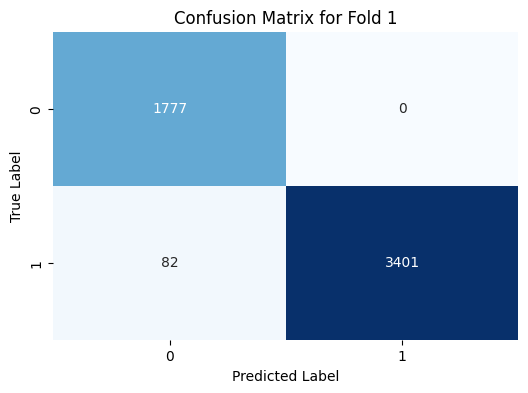

Fold 2
Accuracy for fold 2: 98.38%
F1 Score for fold 2: 0.9839
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1745
           1       1.00      0.98      0.99      3515

    accuracy                           0.98      5260
   macro avg       0.98      0.99      0.98      5260
weighted avg       0.98      0.98      0.98      5260



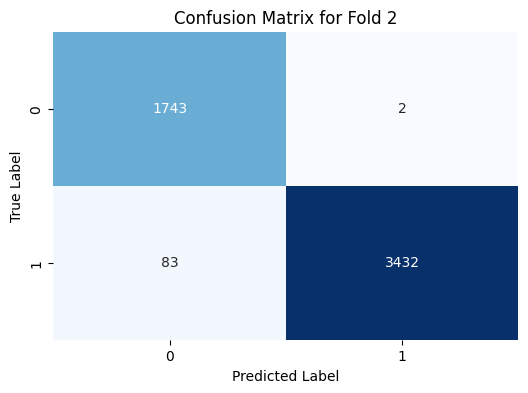

Fold 3
Accuracy for fold 3: 98.52%
F1 Score for fold 3: 0.9852
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1694
           1       1.00      0.98      0.99      3566

    accuracy                           0.99      5260
   macro avg       0.98      0.99      0.98      5260
weighted avg       0.99      0.99      0.99      5260



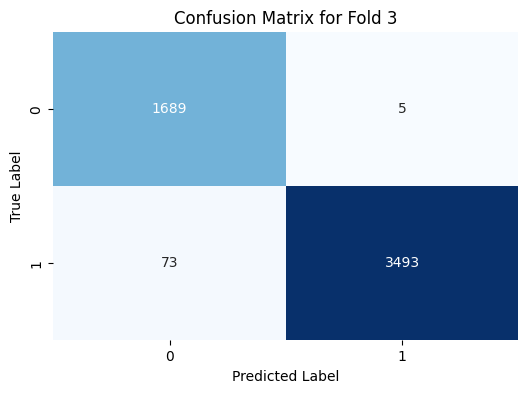

Fold 4
Accuracy for fold 4: 98.17%
F1 Score for fold 4: 0.9819
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1752
           1       1.00      0.97      0.99      3508

    accuracy                           0.98      5260
   macro avg       0.97      0.99      0.98      5260
weighted avg       0.98      0.98      0.98      5260



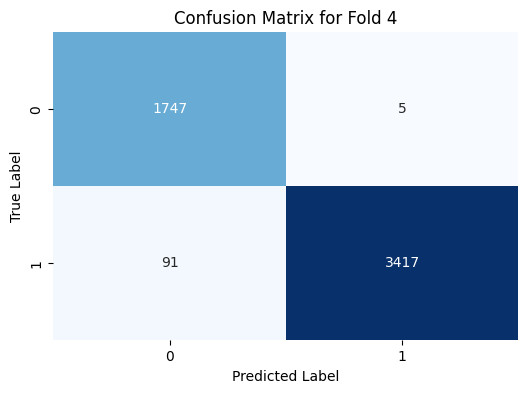

Fold 5
Accuracy for fold 5: 97.87%
F1 Score for fold 5: 0.9788
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1740
           1       1.00      0.97      0.98      3520

    accuracy                           0.98      5260
   macro avg       0.97      0.98      0.98      5260
weighted avg       0.98      0.98      0.98      5260



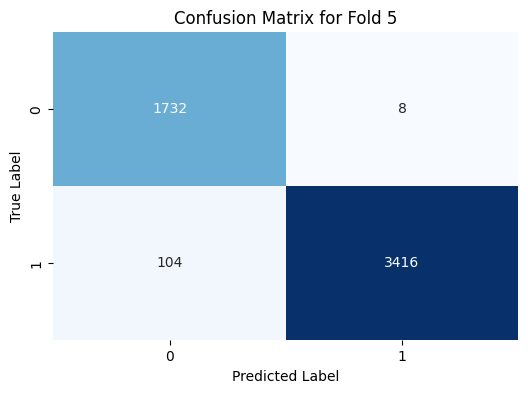

Fold 6
Accuracy for fold 6: 98.25%
F1 Score for fold 6: 0.9826
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1691
           1       1.00      0.98      0.99      3569

    accuracy                           0.98      5260
   macro avg       0.98      0.99      0.98      5260
weighted avg       0.98      0.98      0.98      5260



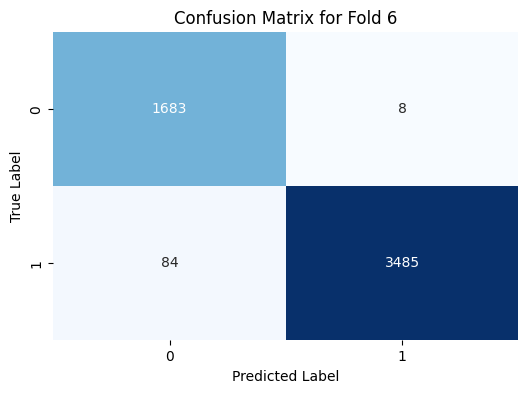

Fold 7
Accuracy for fold 7: 98.23%
F1 Score for fold 7: 0.9824
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1719
           1       1.00      0.98      0.99      3541

    accuracy                           0.98      5260
   macro avg       0.98      0.98      0.98      5260
weighted avg       0.98      0.98      0.98      5260



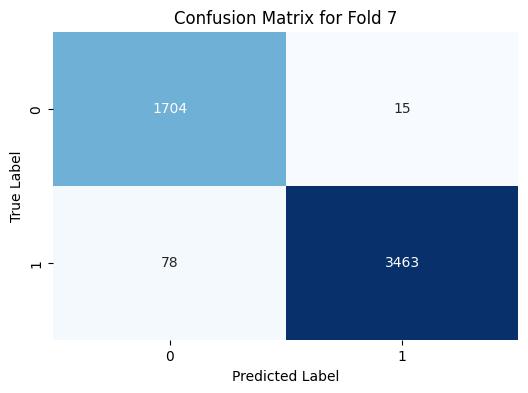

Fold 8
Accuracy for fold 8: 98.27%
F1 Score for fold 8: 0.9828
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1777
           1       1.00      0.98      0.99      3483

    accuracy                           0.98      5260
   macro avg       0.98      0.99      0.98      5260
weighted avg       0.98      0.98      0.98      5260



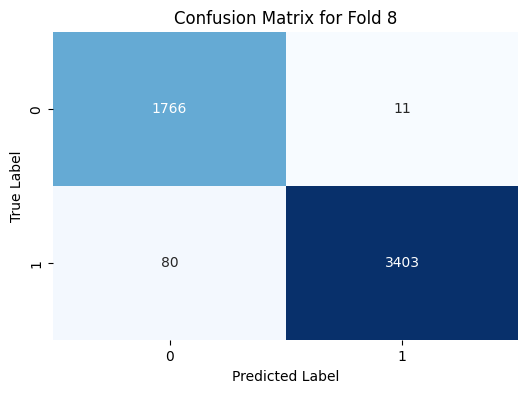

Fold 9
Accuracy for fold 9: 97.83%
F1 Score for fold 9: 0.9785
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1695
           1       1.00      0.97      0.98      3565

    accuracy                           0.98      5260
   macro avg       0.97      0.98      0.98      5260
weighted avg       0.98      0.98      0.98      5260



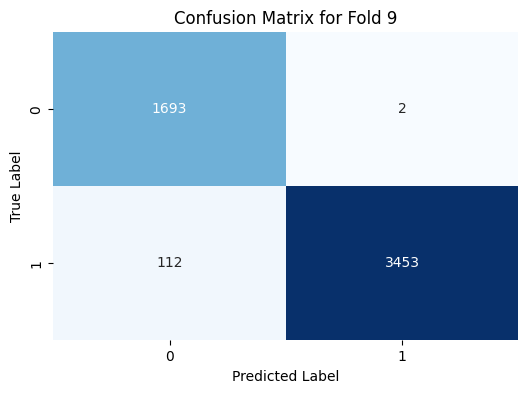

Fold 10
Accuracy for fold 10: 98.12%
F1 Score for fold 10: 0.9813
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1729
           1       1.00      0.97      0.99      3531

    accuracy                           0.98      5260
   macro avg       0.97      0.99      0.98      5260
weighted avg       0.98      0.98      0.98      5260



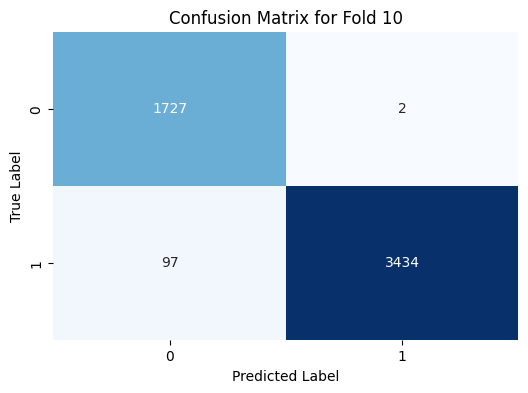

Average Accuracy: 98.21%
Average F1 Score: 0.9822


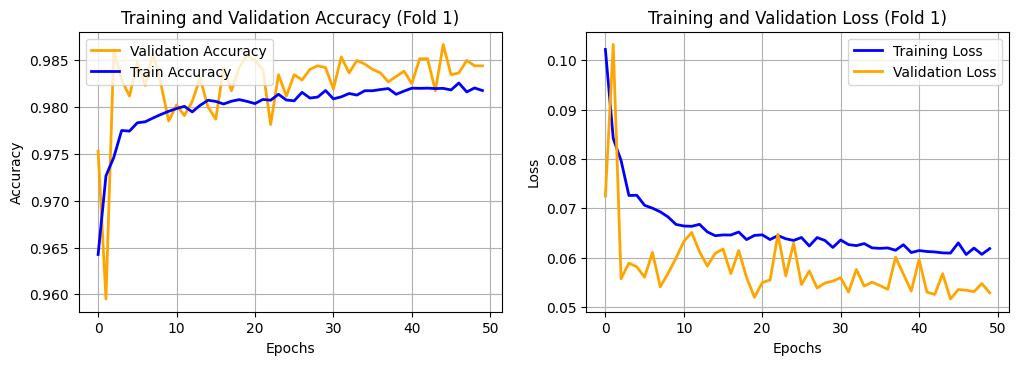

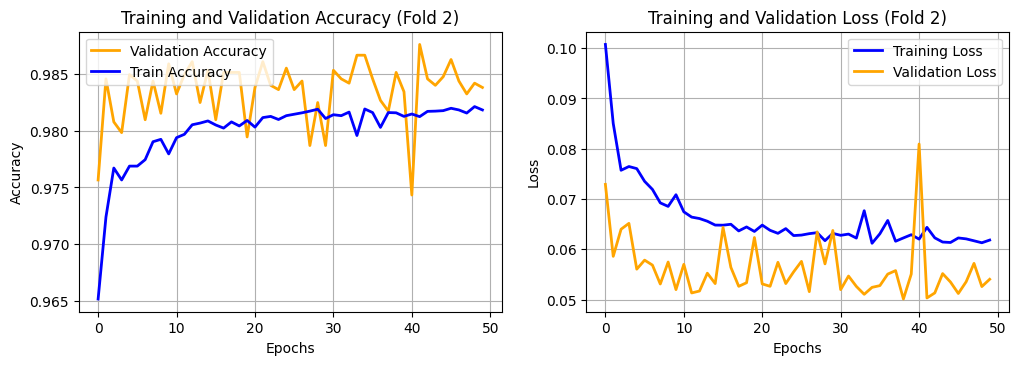

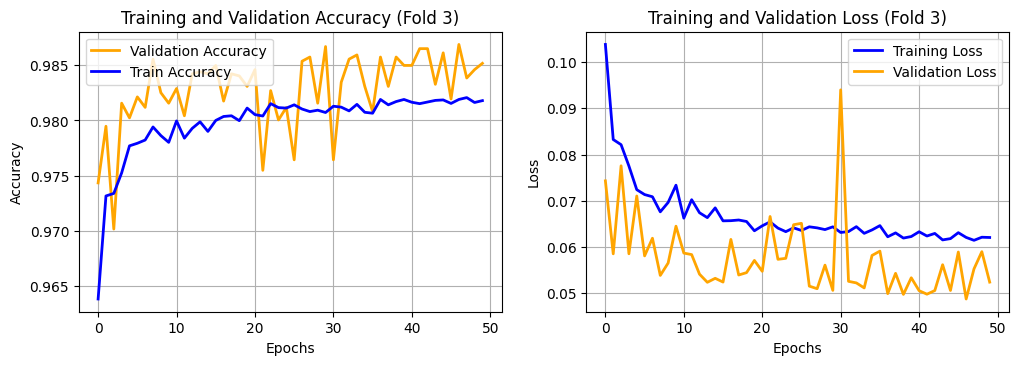

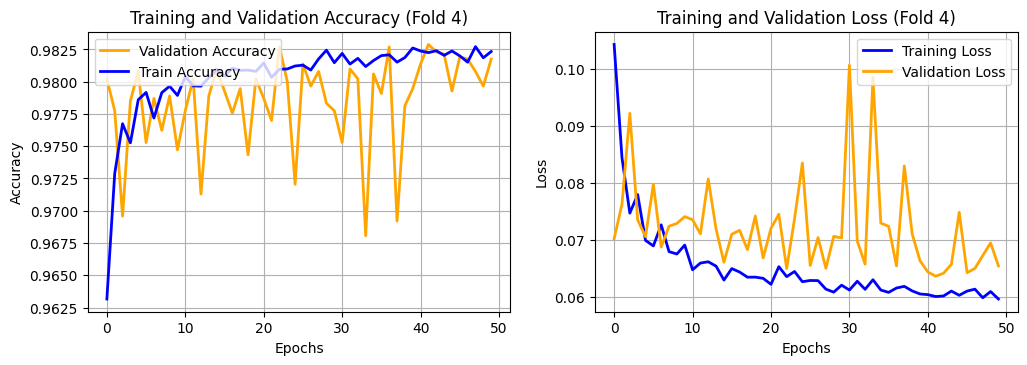

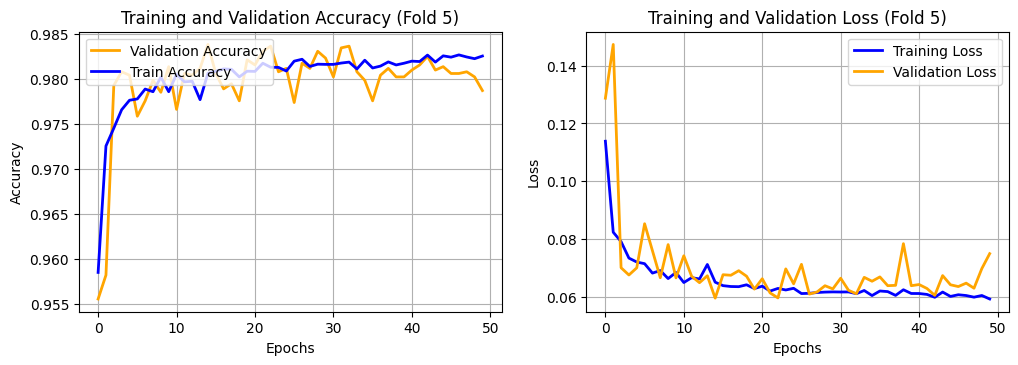

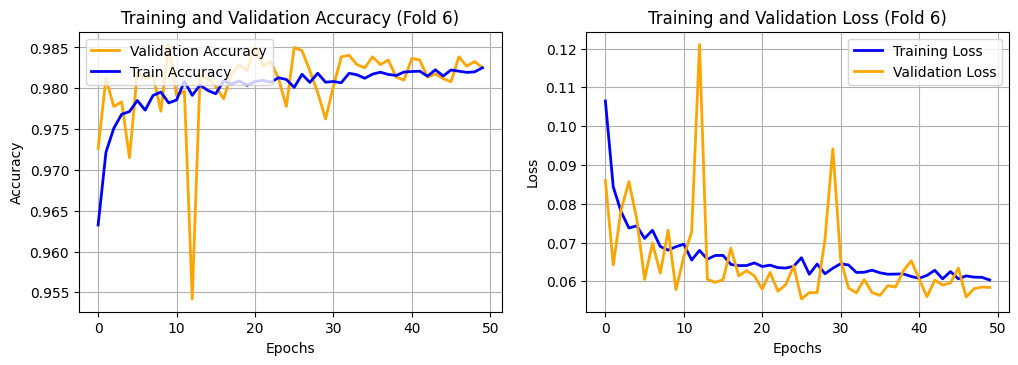

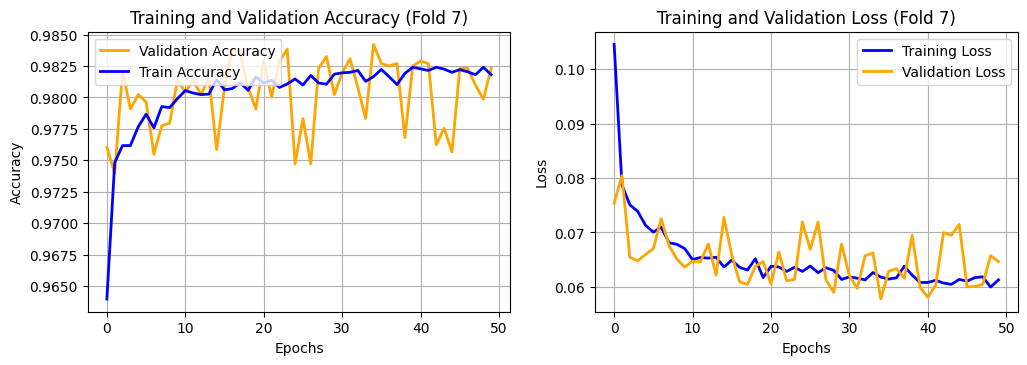

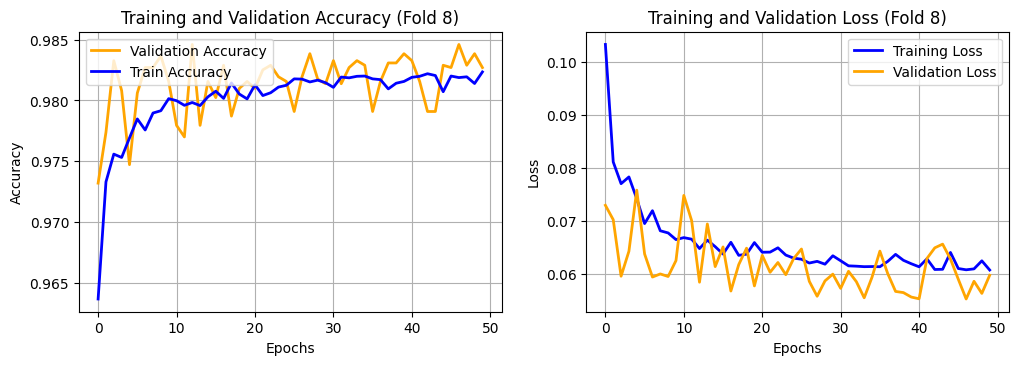

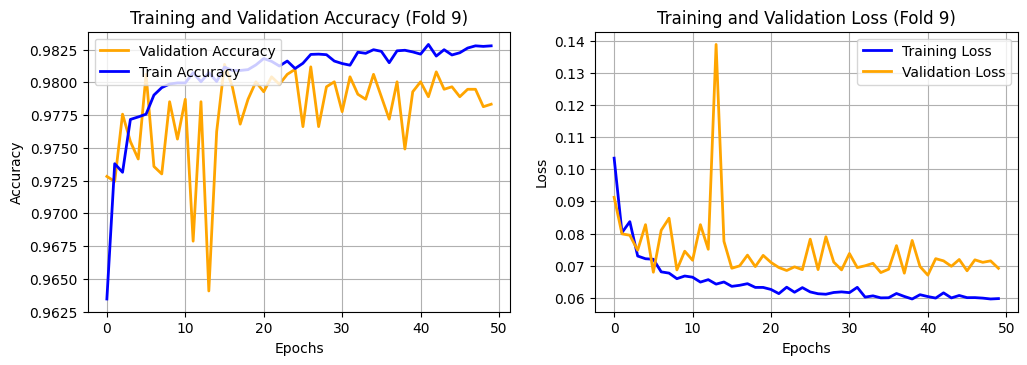

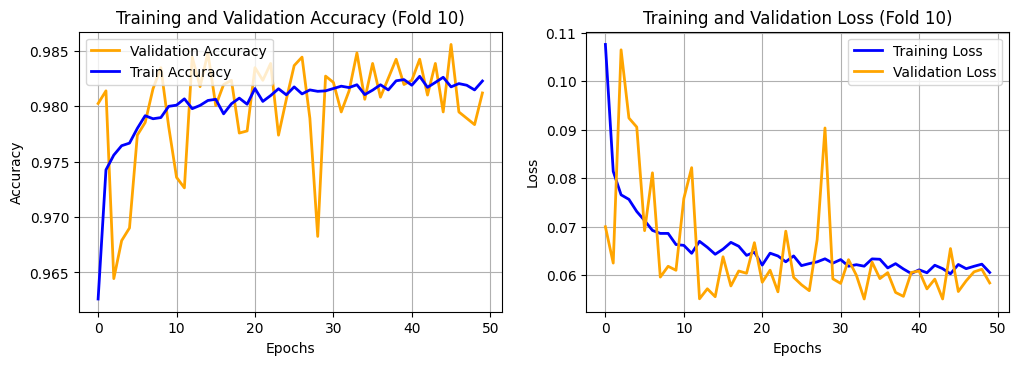

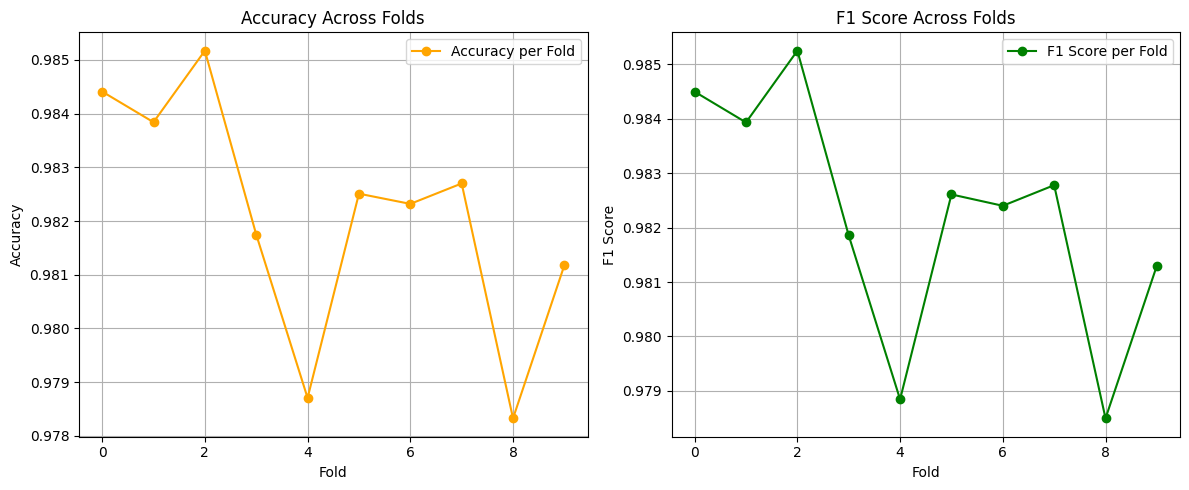

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Label Encoding
# Label Encoding untuk kolom 'Label'
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['label'])
class_names = [str(cls) for cls in label_encoder.classes_]  # Pastikan elemen dalam class_names adalah string

# Cek dan isi nilai hilang
data.fillna(0, inplace=True)  # Mengisi nilai hilang dengan 0

# 2. Define Tab Transformer Model
class TabTransformer(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=4, num_layers=2):
        super(TabTransformer, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)  # Embedding layer
        encoder_layers = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers=num_layers)
        self.fc = nn.Linear(d_model, num_classes)  # Output layer

    def forward(self, x):
        x = self.embedding(x)  # Embed the input features
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)
        x = self.transformer_encoder(x)  # Pass through the transformer encoder
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)  # Final output

# 3. KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=50)  # 10 untuk K-Fold di tubes
all_accuracy, all_f1_scores = [], []
average_train_losses = []
average_val_losses = []  # Menambahkan list untuk menyimpan validation loss
average_val_accuracies = []
average_train_accuracies = []  
average_f1_scores_per_fold = []

for fold, (train_index, val_index) in enumerate(kf.split(data)):
    print(f'Fold {fold + 1}')

    # Split data
    X_train, X_val = data.drop(columns=['label', 'Label_encoded']).iloc[train_index], \
                     data.drop(columns=['label', 'Label_encoded']).iloc[val_index]
    y_train, y_val = data['Label_encoded'].iloc[train_index], data['Label_encoded'].iloc[val_index]

    # Ensure numeric data and handle missing values
    X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
    X_val = X_val.apply(pd.to_numeric, errors='coerce').fillna(0)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train_scaled)
    y_train_tensor = torch.LongTensor(y_train.values)
    X_val_tensor = torch.FloatTensor(X_val_scaled)
    y_val_tensor = torch.LongTensor(y_val.values)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

    # Compute class weights to handle class imbalance
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weights_tensor = torch.FloatTensor(class_weights)

    # Initialize model, loss, and optimizer
    model = TabTransformer(input_dim=X_train_tensor.shape[1], num_classes=len(class_names))
    criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Train the model
    num_epochs = 50  # Set to 20 for better training tubes
    train_losses = []
    val_losses = []  # Menambahkan list untuk menyimpan validation loss
    val_accuracies = []
    train_accuracies = []  # Simpan akurasi pelatihan per epoch
    f1_scores = []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        all_train_preds = []
        all_train_labels = []
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

            # Simpan prediksi dan label untuk menghitung akurasi pelatihan
            _, train_preds = torch.max(outputs, 1)
            all_train_preds.extend(train_preds.numpy())
            all_train_labels.extend(labels.numpy())

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Hitung akurasi pelatihan untuk epoch ini
        train_accuracy = accuracy_score(all_train_labels, all_train_preds)
        train_accuracies.append(train_accuracy)

        # Validate the model
        model.eval()
        val_loss = 0
        all_val_preds = []
        all_val_labels = []
        with torch.no_grad():
            for inputs, labels in val_loader:  # Evaluasi pada data validasi
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                # Simpan prediksi dan label untuk menghitung akurasi validasi
                _, val_preds = torch.max(outputs, 1)
                all_val_preds.extend(val_preds.numpy())
                all_val_labels.extend(labels.numpy())

        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        # Hitung akurasi validasi
        val_accuracy = accuracy_score(all_val_labels, all_val_preds)
        f1 = f1_score(all_val_labels, all_val_preds, average='weighted')
        f1_scores.append(f1)
        val_accuracies.append(val_accuracy)

    # Simpan akurasi pelatihan ke average_train_accuracies
    average_train_accuracies.append(train_accuracies)

    # Metrics calculation
    all_accuracy.append(val_accuracy)
    f1 = f1_score(all_val_labels, all_val_preds, average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {val_accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    print(classification_report(all_val_labels, all_val_preds, target_names=class_names))

    # Store for plotting
    average_train_losses.append(train_losses)
    average_val_losses.append(val_losses)
    average_val_accuracies.append(val_accuracies)
    average_f1_scores_per_fold.append(f1_scores)

    # Plot confusion matrix for the current fold
    conf_matrix = confusion_matrix(all_val_labels, all_val_preds)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label') 
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()    

# 4. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# Plot Loss, Accuracy, and F1 Score for Each Fold
for fold in range(len(average_train_losses)):
    plt.figure(figsize=(12, 8))

    # Plot Accuracy per fold
    plt.subplot(2, 2, 1)
    plt.plot(average_val_accuracies[fold], color='orange', label='Validation Accuracy', linewidth=2)
    plt.plot(average_train_accuracies[fold], color='blue', label='Train Accuracy', linewidth=2)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.title(f'Training and Validation Accuracy (Fold {fold + 1})')
    plt.grid(True)

    # Plot Training and Validation Loss per fold in one graph
    plt.subplot(2, 2, 2)
    plt.plot(average_train_losses[fold], color='blue', label='Training Loss', linewidth=2)
    plt.plot(average_val_losses[fold], color='orange', label='Validation Loss', linewidth=2)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title(f'Training and Validation Loss (Fold {fold + 1})')
    plt.grid(True)

# 2. Plot Accuracy and F1 Score Across All Folds (without average line)
plt.figure(figsize=(12, 5))

# Plot Accuracy Across Folds
plt.subplot(1, 2, 1)
plt.plot(all_accuracy, color='orange', label='Accuracy per Fold', marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Across Folds')
plt.grid(True)

# Plot F1 Score Across Folds
plt.subplot(1, 2, 2)
plt.plot(all_f1_scores, color='green', label='F1 Score per Fold', marker='o')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.legend()
plt.title('F1 Score Across Folds')
plt.grid(True)

plt.tight_layout()
plt.show()

# **Hyperparameter Tuning**

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# 1. Label Encoding
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['label'])
class_names = [str(cls) for cls in label_encoder.classes_]  # Ensure class names are strings

# Cek dan isi nilai hilang
data.fillna(0, inplace=True)

# Ensure all columns in X are numeric
X = data.drop(columns=['label', 'Label_encoded'])
non_numeric_cols = X.select_dtypes(include=['object']).columns

# Drop non-numeric columns
X = X.drop(columns=non_numeric_cols)

# 2. Define Tab Transformer Model
class TabTransformer(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=4, num_layers=2):
        super(TabTransformer, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)  # Embedding layer
        encoder_layers = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers=num_layers)
        self.fc = nn.Linear(d_model, num_classes)  # Output layer

    def forward(self, x):
        x = self.embedding(x)  # Embed the input features
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)
        x = self.transformer_encoder(x)  # Pass through the transformer encoder
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)  # Final output

# Wrapper for TabTransformer
class TabTransformerSklearn(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=4, num_layers=2, lr=0.001, batch_size=16):
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.d_model = d_model
        self.nhead = nhead
        self.num_layers = num_layers
        self.lr = lr
        self.batch_size = batch_size
        self.model = None
        self.scaler = StandardScaler()
        self.classes_ = None  # This is required by sklearn

    def fit(self, X, y):
        # Save the classes for prediction and scoring
        self.classes_ = sorted(set(y))

        # Scale the features
        X_scaled = self.scaler.fit_transform(X)

        # Convert to PyTorch tensors
        X_tensor = torch.FloatTensor(X_scaled)
        y_tensor = torch.LongTensor(y.values)

        # Create DataLoader
        train_dataset = TensorDataset(X_tensor, y_tensor)
        train_loader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)

        # Initialize model, loss, and optimizer
        self.model = TabTransformer(input_dim=self.input_dim, num_classes=len(self.classes_),
                                    d_model=self.d_model, nhead=self.nhead, num_layers=self.num_layers)
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.model.parameters(), lr=self.lr)

        # Train the model
        num_epochs = 50
        for epoch in range(num_epochs):
            self.model.train()
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

    def predict(self, X):
        # Scale the features
        X_scaled = self.scaler.transform(X)
        X_tensor = torch.FloatTensor(X_scaled)

        self.model.eval()
        with torch.no_grad():
            y_pred_probs = self.model(X_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)
        return y_pred.numpy()

# Prepare the data
X = data.drop(columns=['label', 'Label_encoded'])
X = X.drop(columns=non_numeric_cols)
y = data['Label_encoded']

# Define the hyperparameter grid
param_grid = {
    'd_model': [32, 64],
    'nhead': [2, 4],
    'num_layers': [1, 2],
    'lr': [0.001, 0.01],
    'batch_size': [16, 32]
}

# Create an instance of the model wrapper
model_wrapper = TabTransformerSklearn(input_dim=X.shape[1], num_classes=len(class_names))

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_wrapper, param_grid=param_grid,
                           scoring='f1_weighted', cv=10, verbose=1, n_jobs=-1)

# Run the grid search
grid_search.fit(X, y)

# Output the best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated F1 score: {grid_search.best_score_:.4f}")

Fitting 10 folds for each of 32 candidates, totalling 320 fits
Best parameters: {'batch_size': 32, 'd_model': 32, 'lr': 0.001, 'nhead': 2, 'num_layers': 1}
Best cross-validated F1 score: 0.9837


# **CLASSIFICATION Hyperparameter Tuning**

Fold 1
Accuracy for fold 1: 98.67%
F1 Score for fold 1: 0.9868
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1777
           1       1.00      0.98      0.99      3483

    accuracy                           0.99      5260
   macro avg       0.98      0.99      0.99      5260
weighted avg       0.99      0.99      0.99      5260



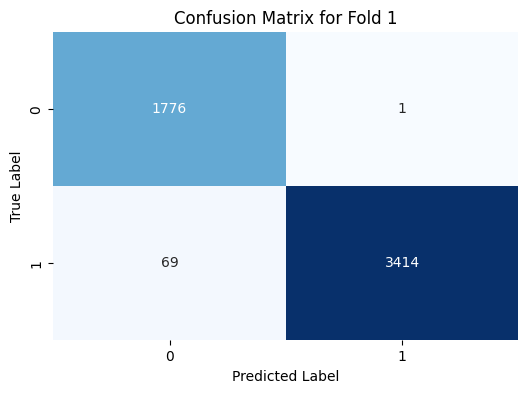

Fold 2
Accuracy for fold 2: 98.31%
F1 Score for fold 2: 0.9832
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1745
           1       1.00      0.98      0.99      3515

    accuracy                           0.98      5260
   macro avg       0.98      0.99      0.98      5260
weighted avg       0.98      0.98      0.98      5260



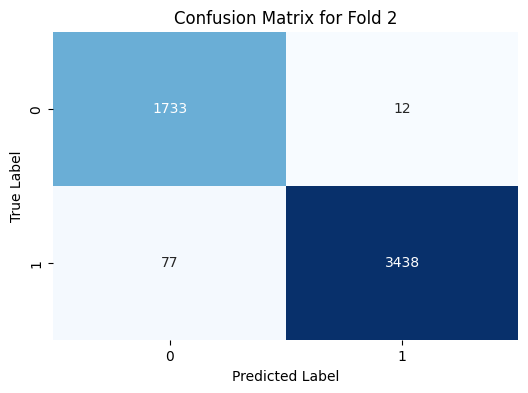

Fold 3
Accuracy for fold 3: 98.56%
F1 Score for fold 3: 0.9856
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1694
           1       1.00      0.98      0.99      3566

    accuracy                           0.99      5260
   macro avg       0.98      0.99      0.98      5260
weighted avg       0.99      0.99      0.99      5260



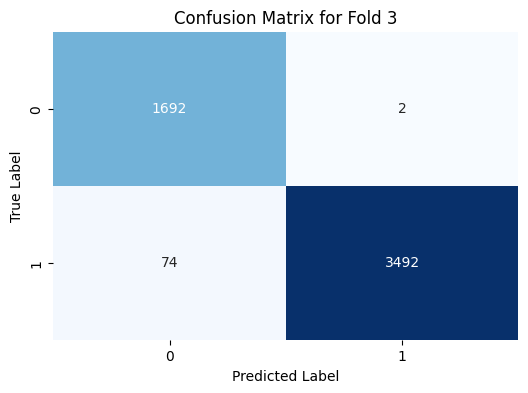

Fold 4
Accuracy for fold 4: 98.12%
F1 Score for fold 4: 0.9813
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1752
           1       1.00      0.97      0.99      3508

    accuracy                           0.98      5260
   macro avg       0.97      0.99      0.98      5260
weighted avg       0.98      0.98      0.98      5260



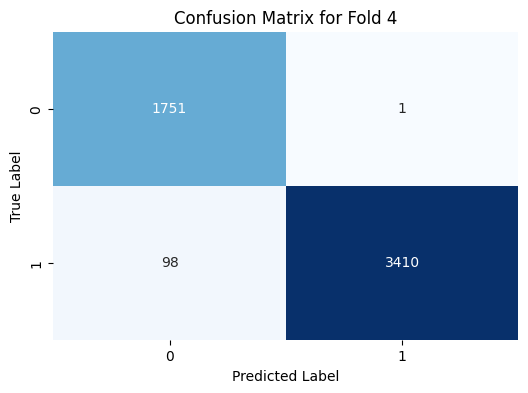

Fold 5
Accuracy for fold 5: 98.29%
F1 Score for fold 5: 0.9830
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1740
           1       1.00      0.97      0.99      3520

    accuracy                           0.98      5260
   macro avg       0.98      0.99      0.98      5260
weighted avg       0.98      0.98      0.98      5260



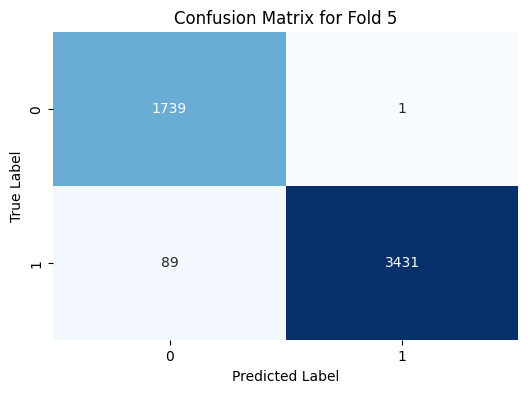

Fold 6
Accuracy for fold 6: 98.38%
F1 Score for fold 6: 0.9839
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1691
           1       1.00      0.98      0.99      3569

    accuracy                           0.98      5260
   macro avg       0.98      0.99      0.98      5260
weighted avg       0.98      0.98      0.98      5260



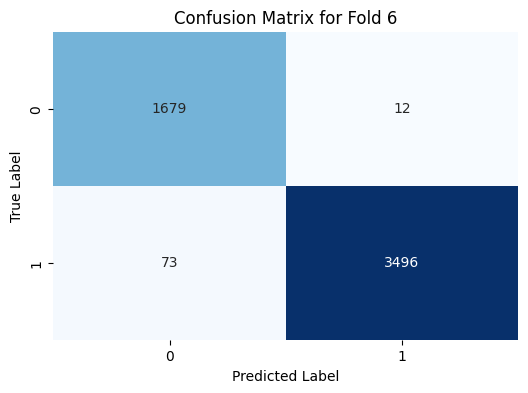

Fold 7
Accuracy for fold 7: 98.37%
F1 Score for fold 7: 0.9837
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1719
           1       1.00      0.98      0.99      3541

    accuracy                           0.98      5260
   macro avg       0.98      0.99      0.98      5260
weighted avg       0.98      0.98      0.98      5260



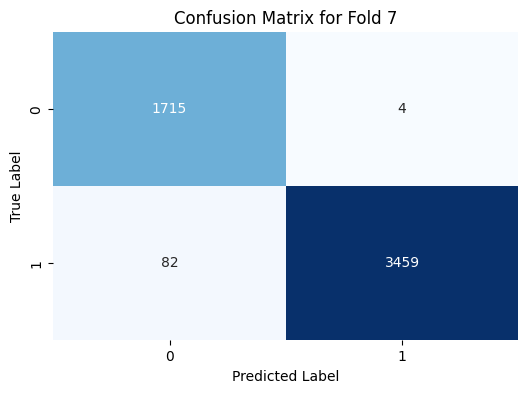

Fold 8
Accuracy for fold 8: 98.42%
F1 Score for fold 8: 0.9843
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1777
           1       1.00      0.98      0.99      3483

    accuracy                           0.98      5260
   macro avg       0.98      0.99      0.98      5260
weighted avg       0.98      0.98      0.98      5260



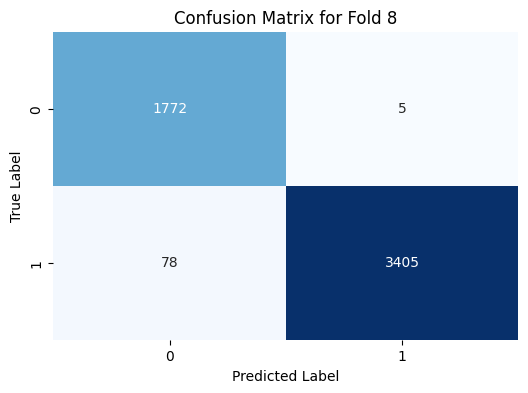

Fold 9
Accuracy for fold 9: 98.00%
F1 Score for fold 9: 0.9802
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1695
           1       1.00      0.97      0.99      3565

    accuracy                           0.98      5260
   macro avg       0.97      0.98      0.98      5260
weighted avg       0.98      0.98      0.98      5260



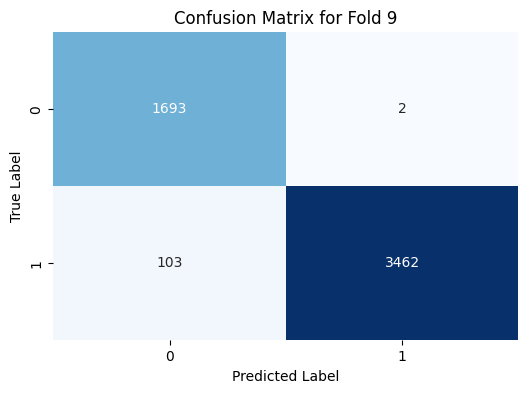

Fold 10
Accuracy for fold 10: 97.70%
F1 Score for fold 10: 0.9772
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1729
           1       1.00      0.97      0.98      3531

    accuracy                           0.98      5260
   macro avg       0.97      0.98      0.97      5260
weighted avg       0.98      0.98      0.98      5260



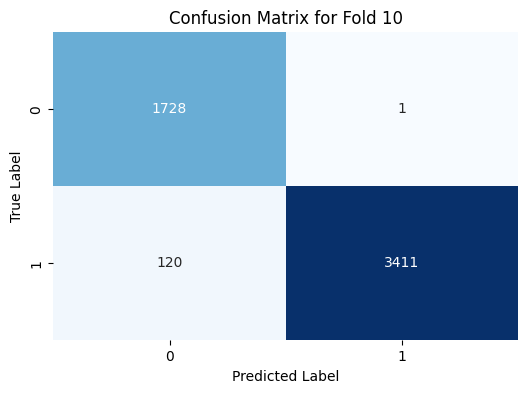

Average Accuracy: 98.28%
Average F1 Score: 0.9829


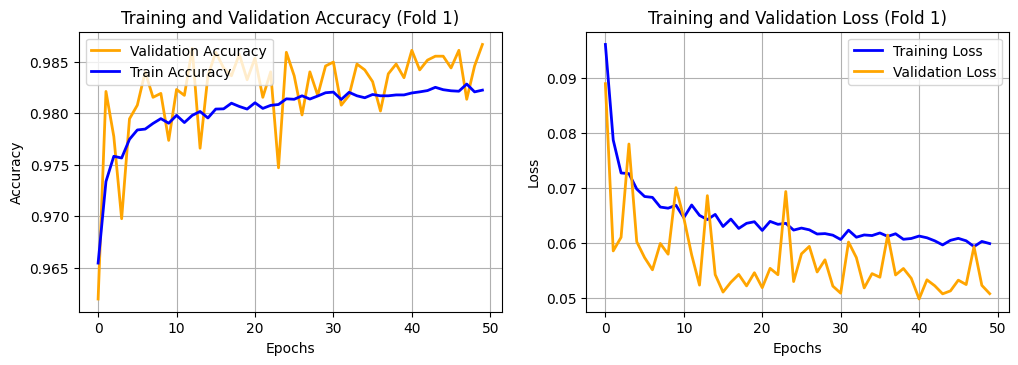

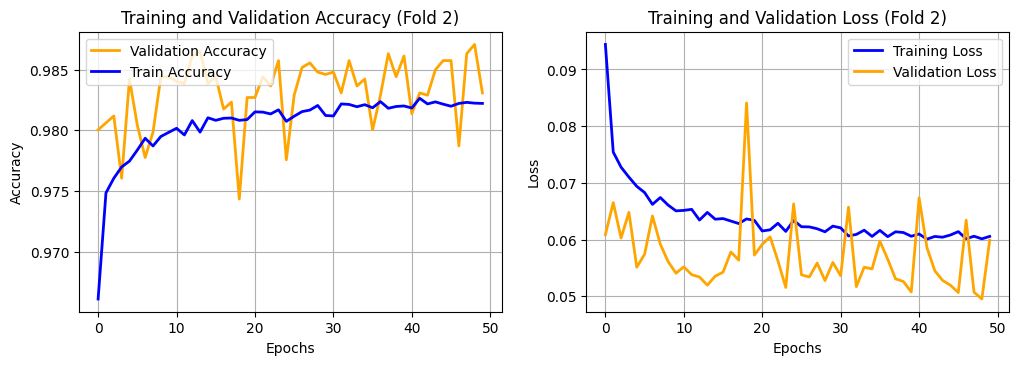

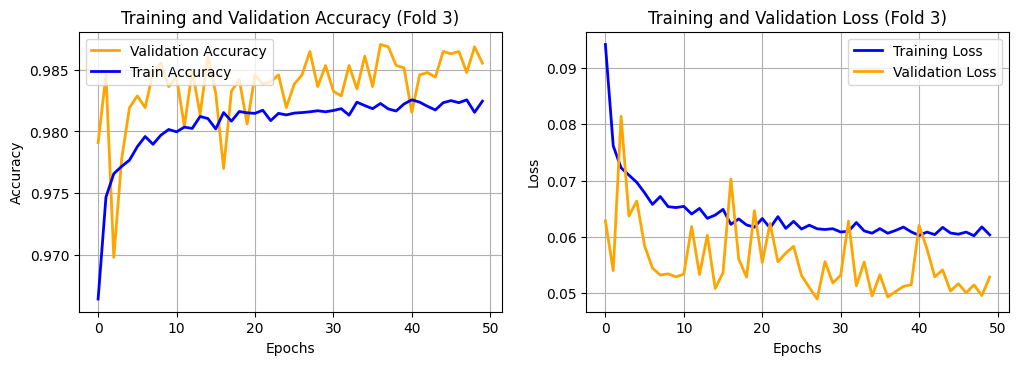

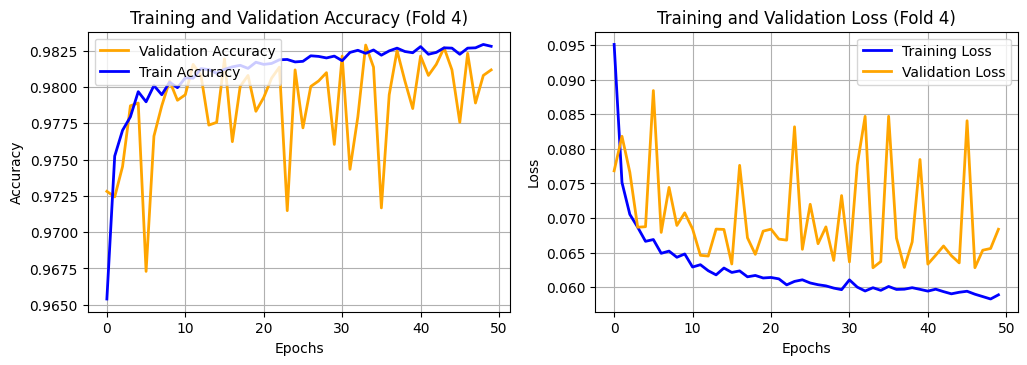

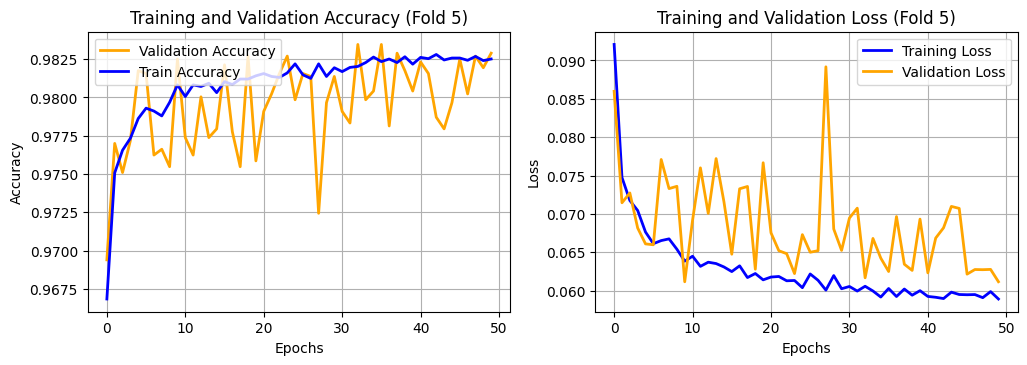

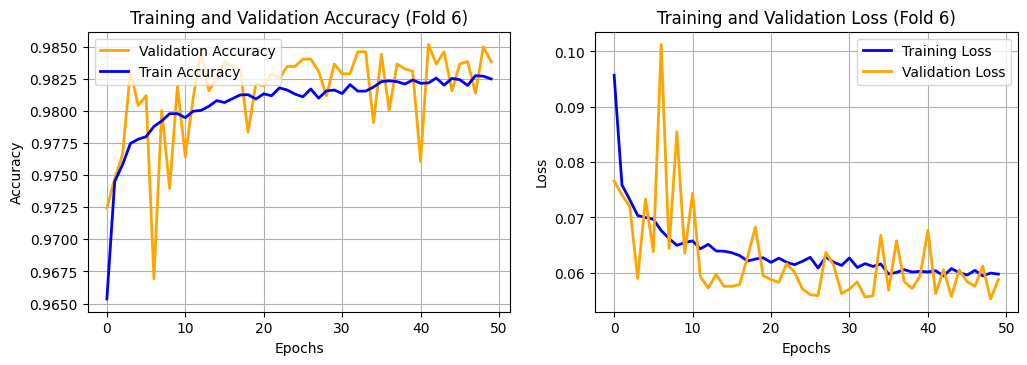

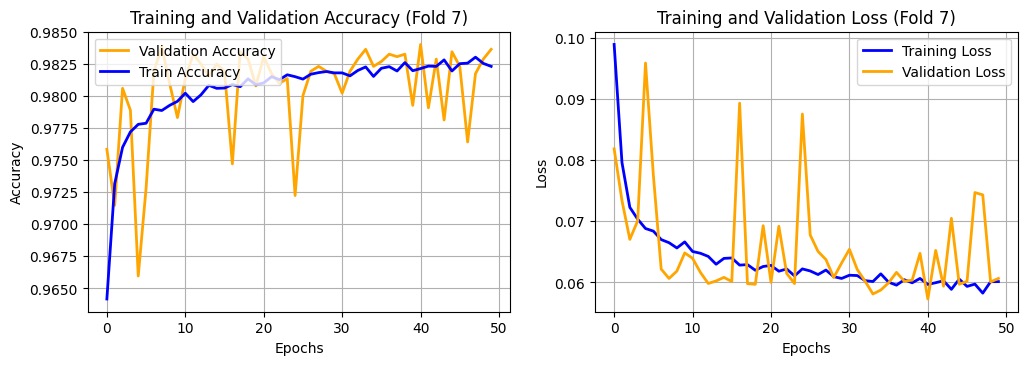

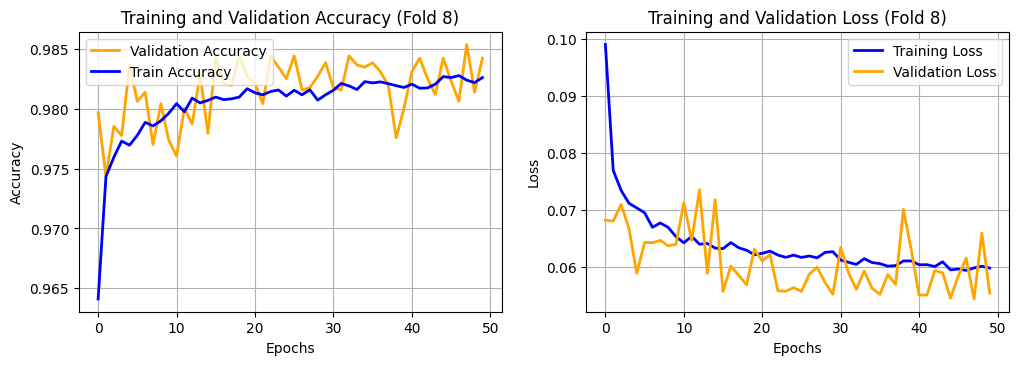

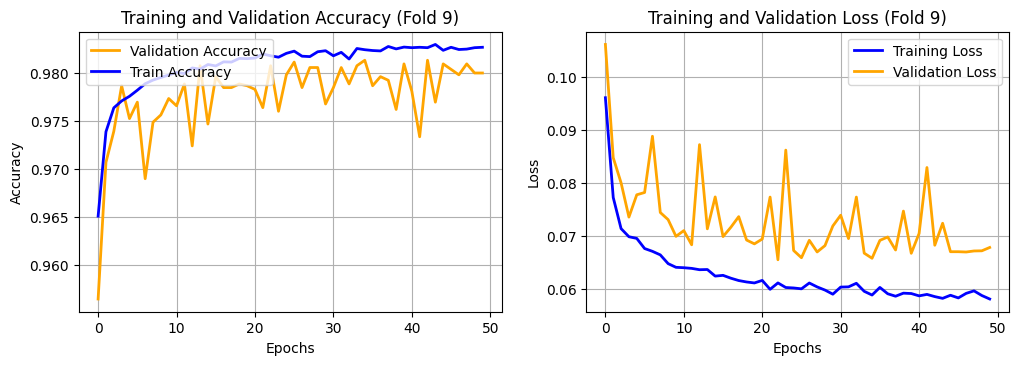

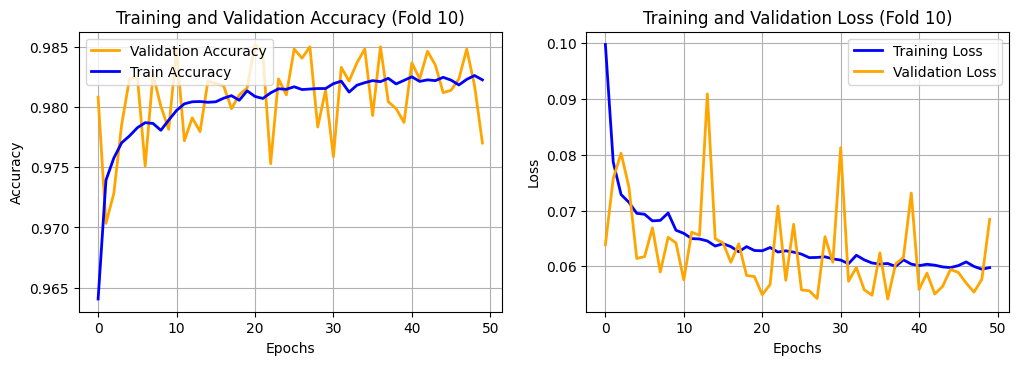

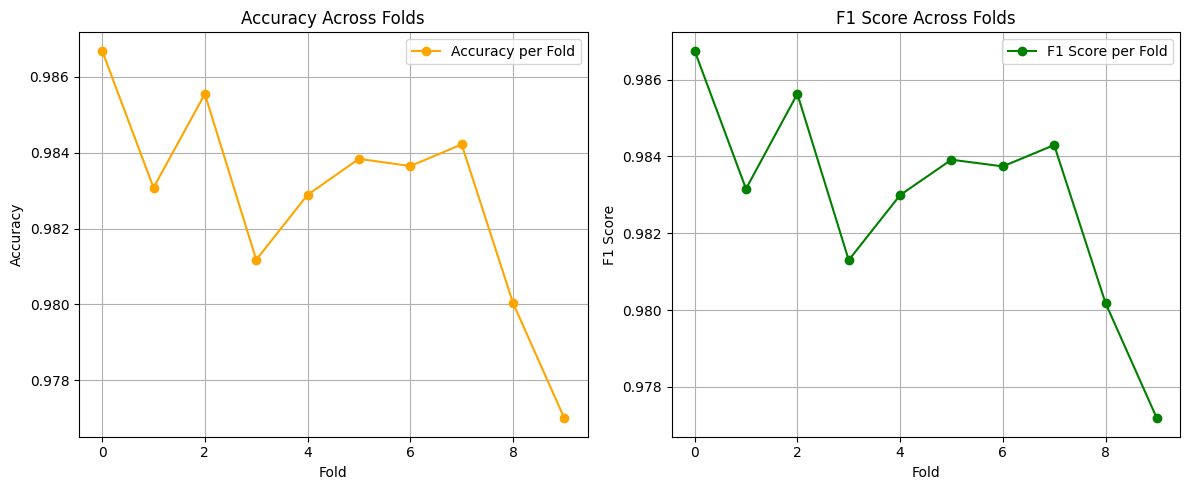

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Label Encoding
# Label Encoding untuk kolom 'Label'
label_encoder = LabelEncoder()
data['Label_encoded'] = label_encoder.fit_transform(data['label'])
class_names = [str(cls) for cls in label_encoder.classes_]  # Pastikan elemen dalam class_names adalah string

# Cek dan isi nilai hilang
data.fillna(0, inplace=True)  # Mengisi nilai hilang dengan 0

# 2. Define Tab Transformer Model
class TabTransformer(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=32, nhead=2, num_layers=1):
        super(TabTransformer, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)  # Embedding layer
        encoder_layers = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers=num_layers)
        self.fc = nn.Linear(d_model, num_classes)  # Output layer

    def forward(self, x):
        x = self.embedding(x)  # Embed the input features
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, seq_length, feature_dim)
        x = self.transformer_encoder(x)  # Pass through the transformer encoder
        x = x.mean(dim=1)  # Average pooling
        return self.fc(x)  # Final output

# 3. KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=50)  # 10 untuk K-Fold di tubes
all_accuracy, all_f1_scores = [], []
average_train_losses = []
average_val_losses = []  # Menambahkan list untuk menyimpan validation loss
average_val_accuracies = []
average_train_accuracies = []  
average_f1_scores_per_fold = []

for fold, (train_index, val_index) in enumerate(kf.split(data)):
    print(f'Fold {fold + 1}')

    # Split data
    X_train, X_val = data.drop(columns=['label', 'Label_encoded']).iloc[train_index], \
                     data.drop(columns=['label', 'Label_encoded']).iloc[val_index]
    y_train, y_val = data['Label_encoded'].iloc[train_index], data['Label_encoded'].iloc[val_index]

    # Ensure numeric data and handle missing values
    X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
    X_val = X_val.apply(pd.to_numeric, errors='coerce').fillna(0)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train_scaled)
    y_train_tensor = torch.LongTensor(y_train.values)
    X_val_tensor = torch.FloatTensor(X_val_scaled)
    y_val_tensor = torch.LongTensor(y_val.values)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    # Compute class weights to handle class imbalance
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weights_tensor = torch.FloatTensor(class_weights)

    # Initialize model, loss, and optimizer
    model = TabTransformer(input_dim=X_train_tensor.shape[1], num_classes=len(class_names))
    criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Train the model
    num_epochs = 50  # Set to 20 for better training tubes
    train_losses = []
    val_losses = []  # Menambahkan list untuk menyimpan validation loss
    val_accuracies = []
    train_accuracies = []  # Simpan akurasi pelatihan per epoch
    f1_scores = []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        all_train_preds = []
        all_train_labels = []
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

            # Simpan prediksi dan label untuk menghitung akurasi pelatihan
            _, train_preds = torch.max(outputs, 1)
            all_train_preds.extend(train_preds.numpy())
            all_train_labels.extend(labels.numpy())

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Hitung akurasi pelatihan untuk epoch ini
        train_accuracy = accuracy_score(all_train_labels, all_train_preds)
        train_accuracies.append(train_accuracy)

        # Validate the model
        model.eval()
        val_loss = 0
        all_val_preds = []
        all_val_labels = []
        with torch.no_grad():
            for inputs, labels in val_loader:  # Evaluasi pada data validasi
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                # Simpan prediksi dan label untuk menghitung akurasi validasi
                _, val_preds = torch.max(outputs, 1)
                all_val_preds.extend(val_preds.numpy())
                all_val_labels.extend(labels.numpy())

        avg_val_loss = val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        # Hitung akurasi validasi
        val_accuracy = accuracy_score(all_val_labels, all_val_preds)
        f1 = f1_score(all_val_labels, all_val_preds, average='weighted')
        f1_scores.append(f1)
        val_accuracies.append(val_accuracy)

    # Simpan akurasi pelatihan ke average_train_accuracies
    average_train_accuracies.append(train_accuracies)

    # Metrics calculation
    all_accuracy.append(val_accuracy)
    f1 = f1_score(all_val_labels, all_val_preds, average='weighted')
    all_f1_scores.append(f1)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {val_accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    print(classification_report(all_val_labels, all_val_preds, target_names=class_names))

    # Store for plotting
    average_train_losses.append(train_losses)
    average_val_losses.append(val_losses)
    average_val_accuracies.append(val_accuracies)
    average_f1_scores_per_fold.append(f1_scores)

    # Plot confusion matrix for the current fold
    conf_matrix = confusion_matrix(all_val_labels, all_val_preds)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label') 
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()    

# 4. Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# Plot Loss, Accuracy, and F1 Score for Each Fold
for fold in range(len(average_train_losses)):
    plt.figure(figsize=(12, 8))

    # Plot Accuracy per fold
    plt.subplot(2, 2, 1)
    plt.plot(average_val_accuracies[fold], color='orange', label='Validation Accuracy', linewidth=2)
    plt.plot(average_train_accuracies[fold], color='blue', label='Train Accuracy', linewidth=2)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.title(f'Training and Validation Accuracy (Fold {fold + 1})')
    plt.grid(True)

    # Plot Training and Validation Loss per fold in one graph
    plt.subplot(2, 2, 2)
    plt.plot(average_train_losses[fold], color='blue', label='Training Loss', linewidth=2)
    plt.plot(average_val_losses[fold], color='orange', label='Validation Loss', linewidth=2)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title(f'Training and Validation Loss (Fold {fold + 1})')
    plt.grid(True)

# 2. Plot Accuracy and F1 Score Across All Folds (without average line)
plt.figure(figsize=(12, 5))

# Plot Accuracy Across Folds
plt.subplot(1, 2, 1)
plt.plot(all_accuracy, color='orange', label='Accuracy per Fold', marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Across Folds')
plt.grid(True)

# Plot F1 Score Across Folds
plt.subplot(1, 2, 2)
plt.plot(all_f1_scores, color='green', label='F1 Score per Fold', marker='o')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.legend()
plt.title('F1 Score Across Folds')
plt.grid(True)

plt.tight_layout()
plt.show()

# **TESTING**

In [38]:
# Tentukan input_dim dari data atau checkpoint
checkpoint_path = "model_best_fold_1.pt"
checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))

# Sesuaikan input_dim dengan data
input_dim = checkpoint['embedding.weight'].shape[1]  # Ambil dari checkpoint

# Definisikan ulang model dengan input_dim yang sesuai
best_model = TabTransformer(input_dim=input_dim, num_classes=len(class_names), d_model=32, nhead=2, num_layers=1)

# Muat bobot model
best_model.load_state_dict(checkpoint)
best_model.eval()

# Lanjutkan dengan evaluasi
all_test_preds = []
all_test_labels = []

with torch.no_grad():
    y_pred_probs = best_model(X_test_tensor)
    _, y_pred = torch.max(y_pred_probs, 1)
    all_test_preds.extend(y_pred.numpy())
    if y_test is not None:
        all_test_labels.extend(y_test.values)

if y_test is not None:
    print("Classification Report:")
    print(classification_report(all_test_labels, all_test_preds, target_names=class_names))
    test_accuracy = accuracy_score(all_test_labels, all_test_preds)
    test_f1 = f1_score(all_test_labels, all_test_preds, average='weighted')
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
    print(f"Test F1 Score: {test_f1:.4f}")

    conf_matrix = confusion_matrix(all_test_labels, all_test_preds)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix on Testing Data')
    plt.show()
else:
    print("Predictions on testing data (no labels available):")
    print(all_test_preds)

C:\Users\user\AppData\Local\Temp\ipykernel_17464\1986437263.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=torch.d

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10520x1005 and 11x32)